In [ ]:
#importing all the necessary packages

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O, data manipulation 
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from pandas import set_option
plt.style.use('ggplot') # nice plots

from sklearn import preprocessing
from imblearn.pipeline import make_pipeline as make_pipeline_imb # To do our transformation in a unique time
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced


from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder    
from sklearn import preprocessing

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import precision_score, recall_score, fbeta_score, confusion_matrix, precision_recall_curve, accuracy_score
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold # for cross validation
from sklearn.model_selection import GridSearchCV # for tuning parameter
from sklearn.model_selection import RandomizedSearchCV  # Randomized search on hyper parameters.
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.pipeline import Pipeline 
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from scipy.stats import ttest_ind, chi2, stats

import os
#print(os.listdir("../input"))

In [ ]:
url = 'https://drive.google.com/file/d/12d3qh4tUBVU1jqQPikT0ySBT-VtZEWry/view?usp=sharing'
path = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(path)

In [ ]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,0,0,0,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,0,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,0,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,0,0,0,0,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,0,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,0,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [ ]:
# X_train = df.drop(["default"], axis=1) #Setting the X to do the split
# y_train = df["default"] # transforming the values in array

In [ ]:
X = df.drop(["default"], axis=1) #Setting the X to do the split
y = df["default"] # transforming the values in array

In [ ]:
X_train_1, X_test_1, y_train_1, y_test=train_test_split(X, y, random_state=2, test_size=0.20)

# Applying the MinMax Scaler:
- Transformation to normalize values ( If the distribution is not Gaussian or the standard deviation is very small, the min-max scaler works better.)

In [ ]:
### Distribution of all Variables after applying MinMax Scaler

In [ ]:

minmax_scale = preprocessing.MinMaxScaler().fit(X_train_1)
X_train_2 = minmax_scale.transform(X_train_1)
X_train_2 = pd.DataFrame(X_train_2, columns= list(X_train_1))

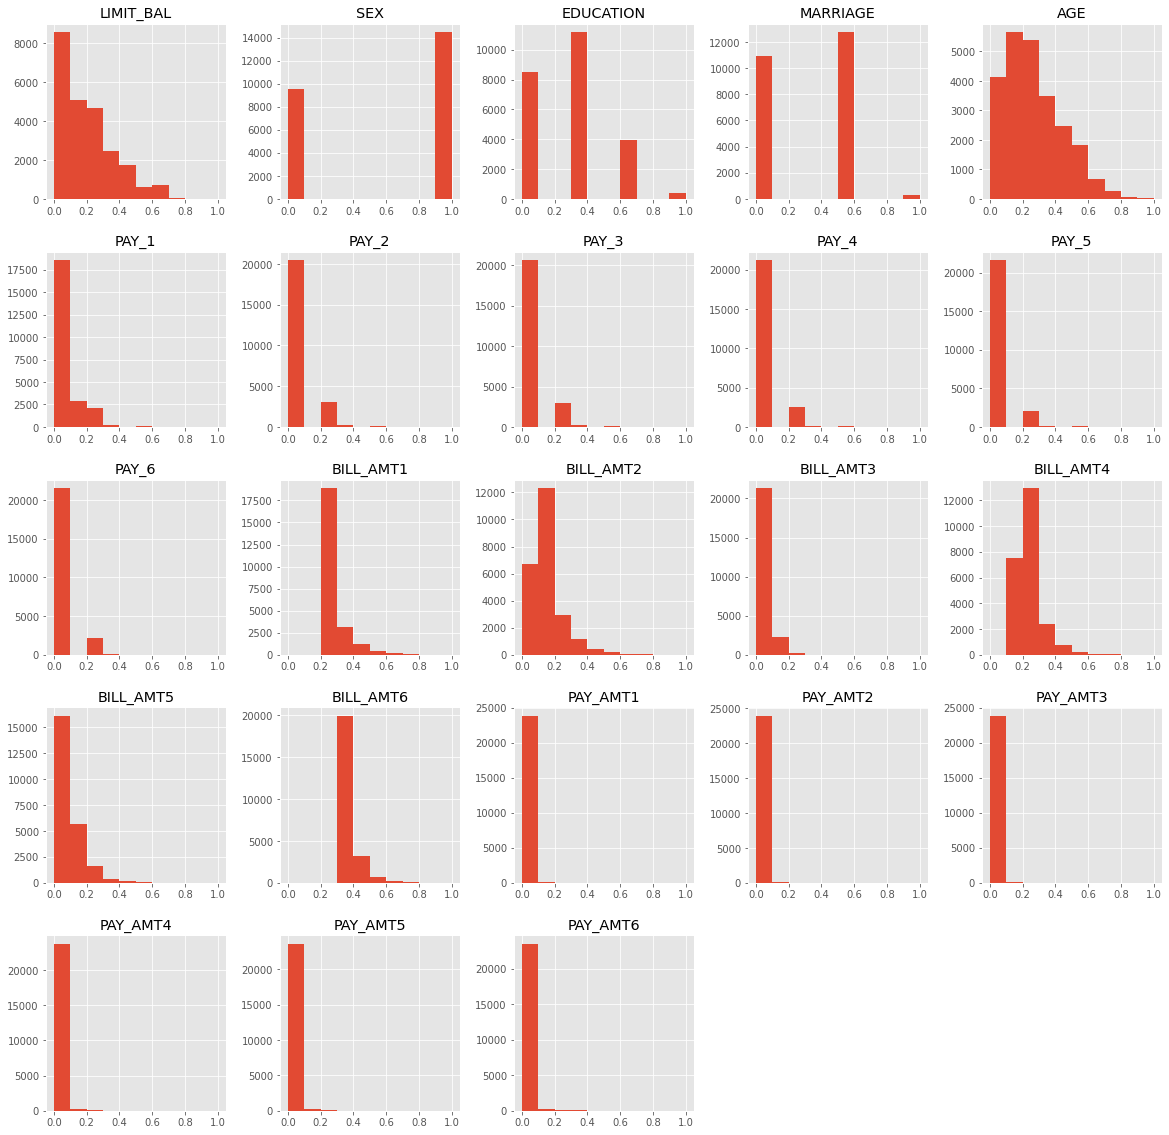

In [ ]:
X_train_2.hist(figsize=(20,20))
plt.show()

In [ ]:
minmax_scale = preprocessing.MinMaxScaler().fit(X_test_1)
X_test = minmax_scale.transform(X_test_1)
X_test = pd.DataFrame(X_test, columns= list(X_test_1))
# X_test.hist(figsize=(20,20))
# plt.show()

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  6000 non-null   float64
 1   SEX        6000 non-null   float64
 2   EDUCATION  6000 non-null   float64
 3   MARRIAGE   6000 non-null   float64
 4   AGE        6000 non-null   float64
 5   PAY_1      6000 non-null   float64
 6   PAY_2      6000 non-null   float64
 7   PAY_3      6000 non-null   float64
 8   PAY_4      6000 non-null   float64
 9   PAY_5      6000 non-null   float64
 10  PAY_6      6000 non-null   float64
 11  BILL_AMT1  6000 non-null   float64
 12  BILL_AMT2  6000 non-null   float64
 13  BILL_AMT3  6000 non-null   float64
 14  BILL_AMT4  6000 non-null   float64
 15  BILL_AMT5  6000 non-null   float64
 16  BILL_AMT6  6000 non-null   float64
 17  PAY_AMT1   6000 non-null   float64
 18  PAY_AMT2   6000 non-null   float64
 19  PAY_AMT3   6000 non-null   float64
 20  PAY_AMT4

In [ ]:
len(y_test)

6000

In [ ]:
from imblearn.over_sampling import SMOTE
print("Before OverSampling, counts of label '1': {}".format(sum(y_train_1 == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train_1 == 0)))

sm = SMOTE(random_state = 2)

X_train, y_train = sm.fit_resample(X_train_2, y_train_1.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train == 0)))

Before OverSampling, counts of label '1': 5301
Before OverSampling, counts of label '0': 18699 

After OverSampling, the shape of train_X: (37398, 23)
After OverSampling, the shape of train_y: (37398,) 

After OverSampling, counts of label '1': 18699
After OverSampling, counts of label '0': 18699


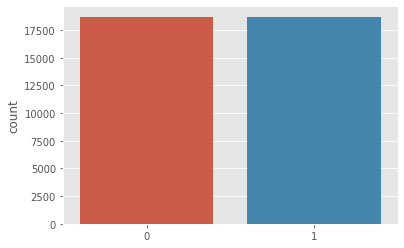

In [ ]:
sns.countplot(x=y_train)

In [ ]:
#Final data after sampling

print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

X_train:  (37398, 23)
X_test:  (6000, 23)
y_train:  (37398,)
y_test:  (6000,)


## Running models on transformed dataset
We will run all the models without doing feature selection. 

In [ ]:
def get_model_results(X_train, X_test, y_train, y_test, model, feat_imp=False):

    # Fit training model to training set
    model.fit(X_train, y_train)

    # Obtain the predicted values and probabilities from the model
    y_train_pred = model.predict(X_train)
    y_train_pred_probs = model.predict_proba(X_train)

    y_test_pred = model.predict(X_test)
    y_test_pred_probs = model.predict_proba(X_test)
    
    # Get confusion matrix
    train_matrix = metrics.confusion_matrix(y_train, y_train_pred)
    test_matrix = metrics.confusion_matrix(y_test, y_test_pred)

    # Get F1 score
    f1_train = metrics.f1_score(y_train, y_train_pred)
    f1_test = metrics.f1_score(y_test, y_test_pred)

    # Print the train and test roc_auc_score, accuracy and test confusion matrix
    print(f"ROC_AUC_Score of train set is {metrics.roc_auc_score(y_train, y_train_pred_probs[:, 1])}.")
    print( f"ROC_AUC_Score of test set is {metrics.roc_auc_score(y_test, y_test_pred_probs[:, 1])}.")
    print(f"F1 of train set is {f1_train.round(4)}.")
    print(f"F1 of test set is {f1_test.round(4)}.")

    # Plot training and test confusion matrices
#     plt.figure(figsize=(12, 4))
#     names = ["True Neg", "False Pos", "False Neg", "True Pos"]
#     train_percent = [
#         "{0:.2%}".format(value)
#         for value in train_matrix.flatten() / np.sum(train_matrix)
#     ]
#     labels = [f"{v1}\n{v2}" for v1, v2 in zip(names, train_percent)]
#     labels = np.asarray(labels).reshape(2, 2)
#     plt.subplot(1, 2, 1)
#     sns.heatmap(train_matrix, annot=labels, fmt="", cmap="Blues")
#     plt.title("Train Set\n")

    names = ["True Neg", "False Pos", "False Neg", "True Pos"]
    test_percent = [
        "{0:.2%}".format(value) for value in test_matrix.flatten() / np.sum(test_matrix)
    ]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(names, test_percent)]
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(test_matrix, annot=labels, fmt="", cmap="Blues")
    plt.title("Test Set\n")
    
    return y_test_pred,\
           metrics.accuracy_score(y_test, y_test_pred),\
           metrics.precision_score(y_test, y_test_pred),\
           metrics.recall_score(y_test, y_test_pred),\
           metrics.f1_score(y_test, y_test_pred),\
           metrics.roc_auc_score(y_test, y_test_pred_probs[:, 1]),\
           metrics.classification_report(y_test, y_test_pred)

In [ ]:
### Refer the file hyperparameter_tuning.ipynb. Those parameters have been used in the models.

ROC_AUC_Score of train set is 0.8672296506096919.
ROC_AUC_Score of test set is 0.6988226132125839.
F1 of train set is 0.7646.
F1 of test set is 0.4525.
              precision    recall  f1-score   support

           0       0.87      0.65      0.74      4665
           1       0.35      0.65      0.45      1335

    accuracy                           0.65      6000
   macro avg       0.61      0.65      0.60      6000
weighted avg       0.75      0.65      0.68      6000

0.45253576072821855


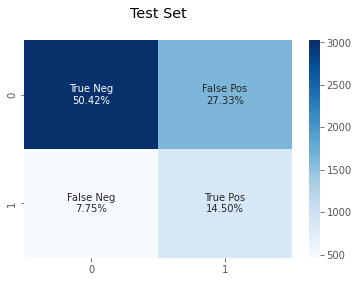

In [ ]:
## XGBoost

import xgboost as xgb
from sklearn import metrics
xgb_model = xgb.XGBClassifier() 
y_pred, acc, prec, rec, f1, auc , classification= get_model_results(X_train, X_test, y_train, y_test, xgb_model, feat_imp= True)
print( classification)
print(f1)


In [ ]:
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(X_train,y_train)
predictions = xgbc.predict(X_test)
xgbc_accuracy = accuracy_score(y_true=y_test, y_pred=predictions)
xgbc_accuracy

0.6491666666666667

ROC_AUC_Score of train set is 0.9997951309391232.
ROC_AUC_Score of test set is 0.5915151880085585.
F1 of train set is 0.9948.
F1 of test set is 0.2696.
              precision    recall  f1-score   support

           0       0.80      0.85      0.82      4665
           1       0.31      0.24      0.27      1335

    accuracy                           0.71      6000
   macro avg       0.55      0.54      0.55      6000
weighted avg       0.69      0.71      0.70      6000



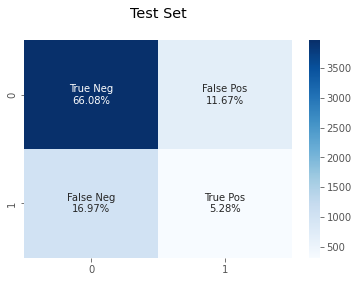

In [ ]:
## Random Forest 

RF = RandomForestClassifier(n_jobs=100, random_state=9,n_estimators=11, verbose=False)
y_pred, acc, prec, rec, f1, auc , classification= get_model_results(X_train, X_test, y_train, y_test,RF, feat_imp= True)
print( classification)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ROC_AUC_Score of train set is 0.7613875893919061.
ROC_AUC_Score of test set is 0.771269434107687.
F1 of train set is 0.6479.
F1 of test set is 0.5402.
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      4665
           1       0.51      0.57      0.54      1335

    accuracy                           0.78      6000
   macro avg       0.69      0.71      0.70      6000
weighted avg       0.79      0.78      0.79      6000



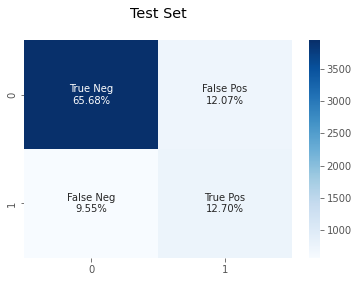

In [ ]:
## Logistic Regression

from sklearn import linear_model
logreg = linear_model.LogisticRegression(C=1)
y_pred, acc, prec, rec, f1, auc , classification= get_model_results(X_train, X_test, y_train, y_test,logreg, feat_imp= True)
print( classification)

ROC_AUC_Score of train set is 0.9997058666238836.
ROC_AUC_Score of test set is 0.6008803304550983.
F1 of train set is 0.9997.
F1 of test set is 0.387.
              precision    recall  f1-score   support

           0       0.83      0.76      0.79      4665
           1       0.35      0.44      0.39      1335

    accuracy                           0.69      6000
   macro avg       0.59      0.60      0.59      6000
weighted avg       0.72      0.69      0.70      6000



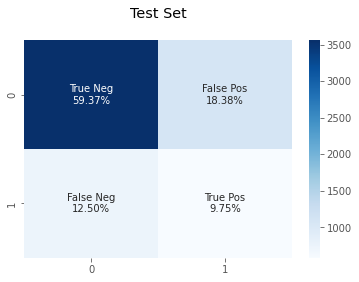

In [ ]:
## KNN

from sklearn.neighbors import KNeighborsClassifier  

from sklearn import linear_model
classifier = KNeighborsClassifier(n_neighbors=1)
y_pred, acc, prec, rec, f1, auc , classification= get_model_results(X_train, X_test, y_train, y_test,classifier, feat_imp= True)
print( classification)

ROC_AUC_Score of train set is 0.7667199464076059.
ROC_AUC_Score of test set is 0.7228431502422614.
F1 of train set is 0.6461.
F1 of test set is 0.5216.
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      4665
           1       0.49      0.56      0.52      1335

    accuracy                           0.77      6000
   macro avg       0.68      0.70      0.69      6000
weighted avg       0.78      0.77      0.78      6000



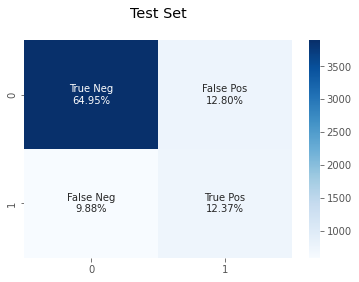

In [ ]:
#Calling the Decision TRee Classifier class

clf_gini = DecisionTreeClassifier(criterion = "gini", max_depth=3, min_samples_leaf=5, max_leaf_nodes=99, random_state=42)
y_pred, acc, prec, rec, f1, auc , classification= get_model_results(X_train, X_test, y_train, y_test,clf_gini, feat_imp= True)
print( classification)


In [ ]:
columns = ['default']
x = pd.DataFrame(X_train)
y= pd.DataFrame(y_train, columns = columns)


In [ ]:
y

,default
0,0
1,0
2,0
3,0
4,1
...,...
37393,1
37394,1
37395,1
37396,1


In [ ]:
train = pd.concat([x, y], axis=1, join="inner")


## Chi-Square Test
for categorical features

In [ ]:
import scipy.stats as stats
from scipy.stats import chi2

def chi_square(data, column1, column2):
  print("Relationship Between ", column1, "  ", column2)
  data_cross = pd.crosstab(data[column1], data[column2])
  #print(dataset_table)
  
  Observed = data_cross.values 
  val = stats.chi2_contingency(data_cross)
  
  
  Expected=val[3]
  
  numrows=len(data_cross.iloc[0:2,0])
  numcol=len(data_cross.iloc[0,0:2])
  ddof=(numrows-1)*(numcol-1)
  #print("Degree of Freedom:",ddof)
  alpha = 0.05
  
  chi_square = sum([(o-e)**2./e for o,e in zip(Observed,Expected)])
  chi_stats = chi_square[0]+chi_square[1]
  
  print("chi-square statistic:-",chi_stats)

  critical_value=chi2.ppf(q=1-alpha,df=ddof)
  print('critical_value:',critical_value)

  #p-value
  p_value=1-chi2.cdf(x=chi_stats,df=ddof)
  print('p-value:',p_value)
  print('Significance level: ',alpha)
  print('Degree of Freedom: ',ddof)
  

  if chi_stats>=critical_value:
      print("Reject H0,There is a relationship between the 2 categorical variables")
  else:
      print("Keep H0,There is no relationship between the 2 categorical variables")
      
  if p_value<=alpha:
      print("Reject H0,There is a relationship between the 2 categorical variables")
  else:
      print("Keep H0,There is no relationship between the 2 categorical variables")

  print("\n")

In [ ]:
Cat_Columns = ['EDUCATION', 'SEX', 'MARRIAGE', ]

for col in Cat_Columns:
  chi_square(train, "default", col)

Relationship Between  default    EDUCATION
chi-square statistic:- 130.36289614432826
critical_value: 3.841458820694124
p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
Reject H0,There is a relationship between the 2 categorical variables
Reject H0,There is a relationship between the 2 categorical variables


Relationship Between  default    SEX
chi-square statistic:- 117.26473121793711
critical_value: 3.841458820694124
p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
Reject H0,There is a relationship between the 2 categorical variables
Reject H0,There is a relationship between the 2 categorical variables


Relationship Between  default    MARRIAGE
chi-square statistic:- 24.449204617239992
critical_value: 3.841458820694124
p-value: 7.629500311523429e-07
Significance level:  0.05
Degree of Freedom:  1
Reject H0,There is a relationship between the 2 categorical variables
Reject H0,There is a relationship between the 2 categorical variables




In [ ]:
selected_features_chi = [ 'MARRIAGE','SEX','EDUCATION' ]

In [ ]:
## Now we will do feature selection for numerical features

# Hypothesis Testing
Our null hypothesis says that 


If a column’s correlation with the response is too weak, then we say that the hypothesis that the feature has no relevance is true. If the correlation coefficient was strong enough, then we can reject the hypothesis that the feature has no relevance in favor of an alternative hypothesis, that the feature does have some relevance.

In [ ]:
from matplotlib import image as mpimg
#plt.figure(figsize=(10, 5))

 
#image1 = mpimg.imread(r'C:\Users\saksh\project_data240\hypothesis_test.png')
#plt.imshow(image1)
#plt.show()

print("In our current dataset, the sample size is greater than 30, so we will be using t-test as the diffreence between z-score and t-score will be negligible.")

In our current dataset, the sample size is greater than 30, so we will be using t-test as the diffreence between z-score and t-score will be negligible.


Our Null Hypothesis states that
H0 -> no diffrenece in features
H1 -> difference in features
- if p>0.01 , can't reject null hypothesis -> remove feature 
- if p<0.01, can reject null hypothesis -> keep feature

In [ ]:
train.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [ ]:
features = [ 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [ ]:
#running test on individual features
P0 = train[train['default']==0]
P1 = train[train['default']==1]

P1.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
4,0.075949,0.0,0.333333,0.0,0.333333,0.000,0.000,0.00,0.00,0.000,...,0.274555,0.138225,0.393843,0.005724,0.002845,0.003374,0.004862,0.019163,0.015801,1
5,0.594937,1.0,0.333333,0.5,0.240741,0.000,0.000,0.00,0.00,0.000,...,0.621757,0.385976,0.527942,0.020870,0.011881,0.014637,0.018050,0.021556,0.366839,1
11,0.012658,0.0,0.666667,1.0,0.703704,0.250,0.000,0.00,0.00,0.000,...,0.214463,0.081869,0.346210,0.001827,0.000950,0.001462,0.001610,0.004785,0.000000,1
15,0.240506,1.0,0.000000,0.0,0.351852,0.250,0.250,0.25,0.25,0.250,...,0.291674,0.159729,0.412406,0.004808,0.002434,0.003374,0.005475,0.008373,0.000000,1
22,0.493671,0.0,0.333333,0.0,0.518519,0.250,0.250,0.25,0.25,0.375,...,0.417430,0.280290,0.514483,0.009158,0.006828,0.015860,0.000006,0.016278,0.000011,1
23,0.215190,1.0,0.333333,0.0,0.314815,0.000,0.250,0.25,0.00,0.000,...,0.204069,0.066383,0.331668,0.000000,0.000000,0.010057,0.000000,0.000000,0.000000,1
28,0.278481,0.0,0.666667,0.0,0.740741,0.125,0.000,0.00,0.00,0.000,...,0.193873,0.060473,0.326684,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
32,0.177215,0.0,0.333333,0.0,0.574074,0.250,0.250,0.25,0.25,0.250,...,0.360432,0.222747,0.466705,0.009272,0.004809,0.010123,0.000000,0.013345,0.011973,1
33,0.316456,1.0,0.000000,0.5,0.148148,0.000,0.000,0.00,0.00,0.000,...,0.194451,0.064793,0.328072,0.000000,0.002893,0.000570,0.006098,0.003452,0.000000,1
40,0.291139,1.0,0.000000,0.5,0.166667,0.125,0.125,0.00,0.00,0.000,...,0.191742,0.058341,0.324887,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1


In [ ]:
from scipy.stats import ttest_ind

selected_features_ttest=[]

for x in features:
    tscore, pval = ttest_ind(P0[x], P1[x])
    print('\nGenerating t_test result for:', x)
    print('t_c=%.3f, p=%.3f'% (tscore, pval))
    
    if pval>0.01 : 
        
        print ('Cannot reject h0 : no difference')
        
    else: 
        print('Cannot accept h0 : difference')
        selected_features_ttest.append(x)

    


Generating t_test result for: LIMIT_BAL
t_c=40.612, p=0.000
Cannot accept h0 : difference

Generating t_test result for: SEX
t_c=10.846, p=0.000
Cannot accept h0 : difference

Generating t_test result for: EDUCATION
t_c=-8.521, p=0.000
Cannot accept h0 : difference

Generating t_test result for: MARRIAGE
t_c=6.039, p=0.000
Cannot accept h0 : difference

Generating t_test result for: AGE
t_c=-2.046, p=0.041
Cannot reject h0 : no difference

Generating t_test result for: PAY_1
t_c=-82.749, p=0.000
Cannot accept h0 : difference

Generating t_test result for: PAY_2
t_c=-66.637, p=0.000
Cannot accept h0 : difference

Generating t_test result for: PAY_3
t_c=-57.489, p=0.000
Cannot accept h0 : difference

Generating t_test result for: PAY_4
t_c=-52.586, p=0.000
Cannot accept h0 : difference

Generating t_test result for: PAY_5
t_c=-49.138, p=0.000
Cannot accept h0 : difference

Generating t_test result for: PAY_6
t_c=-46.805, p=0.000
Cannot accept h0 : difference

Generating t_test result fo

In [ ]:
selected_features_ttest

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [ ]:
X_train_ttest = X_train[selected_features_ttest]

In [ ]:
X_test_ttest = X_test[selected_features_ttest]

In [ ]:
X_test

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.010101,1.0,0.333333,0.0,0.275862,0.000,0.0,0.25,0.0,0.0,...,0.174827,0.040564,0.099714,0.056156,0.009907,0.000000,0.000926,0.002395,0.002345,0.000533
1,0.494949,0.0,0.333333,0.5,0.086207,0.000,0.0,0.00,0.0,0.0,...,0.283095,0.162170,0.207270,0.161130,0.018591,0.005861,0.006801,0.013290,0.011772,0.008228
2,0.141414,0.0,0.000000,0.5,0.086207,0.000,0.0,0.00,0.0,0.0,...,0.156729,0.021577,0.080717,0.036656,0.001115,0.001016,0.001116,0.000224,0.001547,0.000000
3,0.050505,1.0,0.333333,0.0,0.258621,0.000,0.0,0.00,0.0,0.0,...,0.199096,0.064358,0.109933,0.065596,0.006192,0.002969,0.001599,0.003232,0.002412,0.002032
4,0.212121,0.0,0.000000,0.5,0.137931,0.000,0.0,0.00,0.0,0.0,...,0.180039,0.045349,0.104312,0.059954,0.004365,0.001383,0.001488,0.002335,0.002389,0.001977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.010101,1.0,0.666667,0.5,0.431034,0.000,0.0,0.00,0.0,0.0,...,0.165074,0.023239,0.087222,0.037408,0.002916,0.009613,0.004319,0.021399,0.011207,0.000284
5996,0.020202,0.0,0.333333,0.5,0.086207,0.000,0.0,0.00,0.0,0.0,...,0.179750,0.046512,0.106830,0.062152,0.008901,0.004783,0.002232,0.006707,0.000000,0.004729
5997,0.191919,1.0,0.666667,0.5,0.568966,0.000,0.0,0.00,0.0,0.0,...,0.158936,0.020285,0.080648,0.036235,0.006031,0.003548,0.001520,0.000000,0.000000,0.000000
5998,0.252525,1.0,0.000000,0.5,0.172414,0.000,0.0,0.00,0.0,0.0,...,0.161010,0.046376,0.080797,0.036617,0.004043,0.005597,0.027787,0.012402,0.000893,0.004226


In [ ]:
### Running models on selected features

ROC_AUC_Score of train set is 0.8603522814921089.
ROC_AUC_Score of test set is 0.6961183568770548.
F1 of train set is 0.7573.
F1 of test set is 0.4563.
              precision    recall  f1-score   support

           0       0.87      0.65      0.74      4665
           1       0.35      0.66      0.46      1335

    accuracy                           0.65      6000
   macro avg       0.61      0.65      0.60      6000
weighted avg       0.75      0.65      0.68      6000



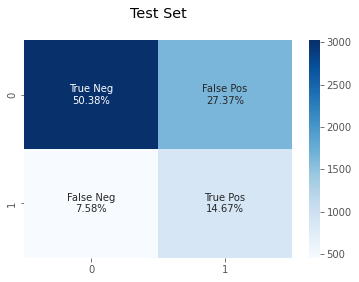

In [ ]:
## XGBoost

import xgboost as xgb
from sklearn import metrics
xgb_model_ttest = xgb.XGBClassifier()

y_pred, acc, prec, rec, f1, auc , classification= get_model_results(X_train_ttest, X_test_ttest, y_train, y_test, xgb_model_ttest, feat_imp= True)
print( classification)

ROC_AUC_Score of train set is 0.9993282089155687.
ROC_AUC_Score of test set is 0.559297421631321.
F1 of train set is 0.991.
F1 of test set is 0.2814.
              precision    recall  f1-score   support

           0       0.79      0.78      0.79      4665
           1       0.27      0.29      0.28      1335

    accuracy                           0.67      6000
   macro avg       0.53      0.54      0.53      6000
weighted avg       0.68      0.67      0.67      6000



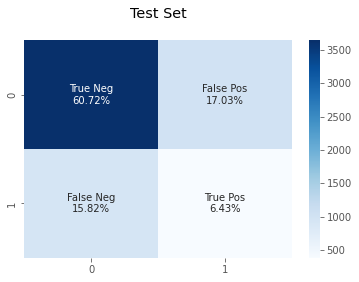

In [ ]:
## Random Forest 

RF_ttest = RandomForestClassifier(n_jobs=100, random_state=9,n_estimators=11, verbose=False)
y_pred, acc, prec, rec, f1, auc , classification= get_model_results(X_train_ttest, X_test_ttest, y_train, y_test,RF_ttest, feat_imp= True)
print( classification)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ROC_AUC_Score of train set is 0.7611006760393011.
ROC_AUC_Score of test set is 0.7706261867199763.
F1 of train set is 0.647.
F1 of test set is 0.541.
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      4665
           1       0.51      0.58      0.54      1335

    accuracy                           0.78      6000
   macro avg       0.69      0.71      0.70      6000
weighted avg       0.79      0.78      0.79      6000



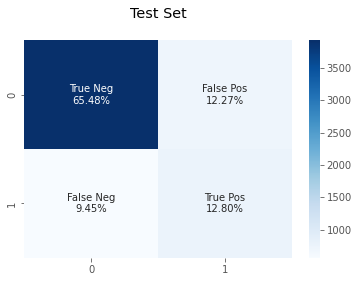

In [ ]:
## Logistic Regression

from sklearn import linear_model
logreg_ttest = linear_model.LogisticRegression(C=1 )
y_pred, acc, prec, rec, f1, auc , classification= get_model_results(X_train_ttest, X_test_ttest, y_train, y_test,logreg_ttest, feat_imp= True)
print( classification)

ROC_AUC_Score of train set is 0.9960425691213435.
ROC_AUC_Score of test set is 0.5870057925984802.
F1 of train set is 0.996.
F1 of test set is 0.3702.
              precision    recall  f1-score   support

           0       0.82      0.74      0.78      4665
           1       0.32      0.43      0.37      1335

    accuracy                           0.67      6000
   macro avg       0.57      0.59      0.57      6000
weighted avg       0.71      0.67      0.69      6000



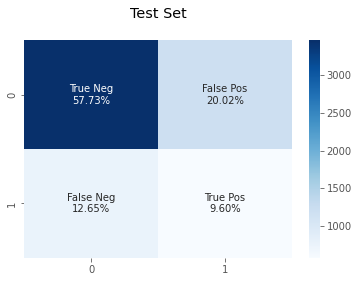

In [ ]:
## KNN

from sklearn.neighbors import KNeighborsClassifier  


from sklearn import linear_model
classifier_ttest = KNeighborsClassifier(n_neighbors=1)
y_pred, acc, prec, rec, f1, auc , classification= get_model_results(X_train_ttest, X_test_ttest, y_train, y_test,classifier_ttest, feat_imp= True)
print( classification)

ROC_AUC_Score of train set is 0.7667199464076059.
ROC_AUC_Score of test set is 0.7228431502422614.
F1 of train set is 0.6461.
F1 of test set is 0.5216.
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      4665
           1       0.49      0.56      0.52      1335

    accuracy                           0.77      6000
   macro avg       0.68      0.70      0.69      6000
weighted avg       0.78      0.77      0.78      6000



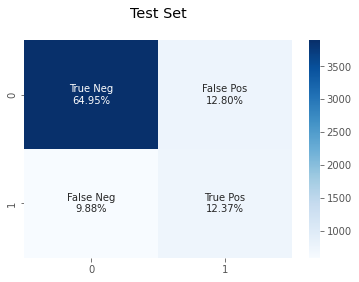

In [ ]:
clf_gini_ttest = DecisionTreeClassifier(criterion = "gini", max_depth=3, min_samples_leaf=5, max_leaf_nodes=99, random_state=42)
y_pred, acc, prec, rec, f1, auc , classification= get_model_results(X_train_ttest, X_test_ttest, y_train, y_test,clf_gini, feat_imp= True)
print( classification)


# Correlation Feature Selection
This is for numerical features

In [ ]:
### Correlation of the Amount of bill statement in April — September 2005.

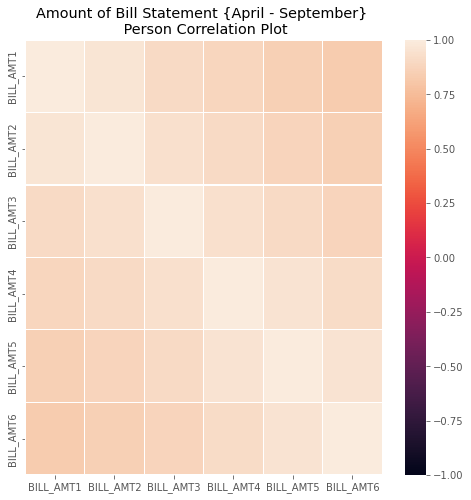

In [ ]:
var = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
plt.figure(figsize = (8,8))
plt.title('Amount of Bill Statement {April - September} \n Person Correlation Plot')
corr = X_train[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1,vmax=1)
plt.show()

- Correlation is decreasing with distance between months. Lowest correlations are between Sept-April.

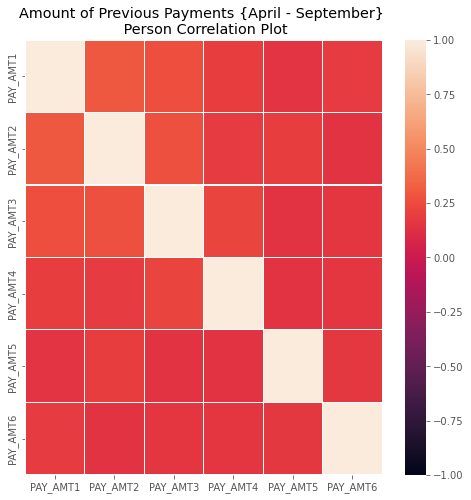

In [ ]:
### Correlation of Amount of previous payment in April — September 2005.
var = ['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
plt.figure(figsize = (8,8))
plt.title('Amount of Previous Payments {April - September} \n Person Correlation Plot')
corr = X_train[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1,vmax=1)
plt.show()

 - There are no correlations between amounts of previous payments for April-Sept 2005.

In [ ]:
### Correlation between Repayment status in April — September 2005.


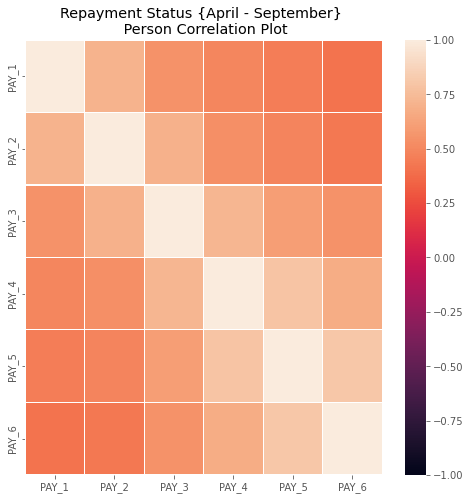

In [ ]:
var = ['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
plt.figure(figsize = (8,8))
plt.title('Repayment Status {April - September} \n Person Correlation Plot')
corr = X_train[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1,vmax=1)
plt.show()

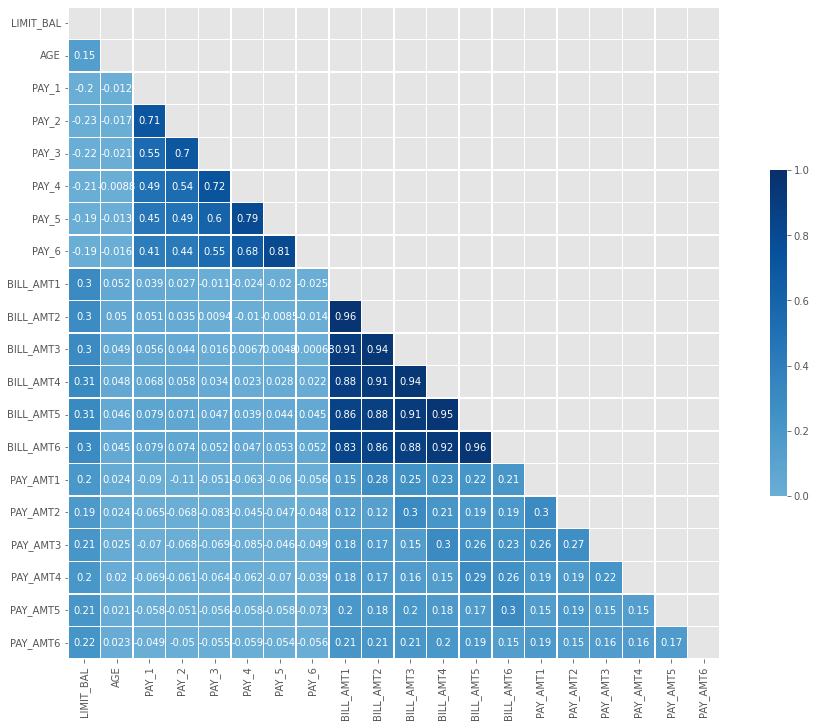

In [ ]:
numeric = X_train.drop(['MARRIAGE','SEX','EDUCATION'], axis=1).corr()
f, ax = plt.subplots(figsize=(18, 12))

mask = np.triu(np.ones_like(numeric, dtype=bool))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(numeric, mask = mask,cmap='Blues', cbar_kws={'shrink': .5}, vmin=0,vmax=1, center=0,
            square=True, linewidths=.5,annot=True, annot_kws={'size': 10})
cbar = ax.collections[0].colorbar

- As shown in the correlation matrix above, some features show high correlations with each other. In particular, there exist an high positive correlation among the BILL_AMTn features, for example:

- BILL_AMT1 and BILL_AMT2 have 0.95
- BILL_AMT2 and BILL_AMT3 have 0.93
- BILL_AMT4 and BILL_AMT5 have 0.94

- From Feature Selection technique - Correlation, attributes from the given dataset are carefully analysed and will be selected to feed the machine learning algorithm.

- As previously seen in the correlation matrix, some features in this dataset are strongly linearly correlated, so it is not meaningful to keep all of them because they may contain redundant information. In this way, features with a Pearson coefficient with other predictors should be discarded.

- In particular, at this step the following features will be removed: BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6.

In [ ]:
#including 
selected_features_corr = ['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6' ,'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','BILL_AMT1','MARRIAGE','SEX','EDUCATION']


In [ ]:
X_train_corr = X_train[selected_features_corr]
X_test_corr = X_test[selected_features_corr]

In [ ]:
### Testing models on selected features

ROC_AUC_Score of train set is 0.832056648993725.
ROC_AUC_Score of test set is 0.731501940901847.
F1 of train set is 0.7234.
F1 of test set is 0.441.
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      4665
           1       0.51      0.39      0.44      1335

    accuracy                           0.78      6000
   macro avg       0.67      0.64      0.65      6000
weighted avg       0.76      0.78      0.77      6000



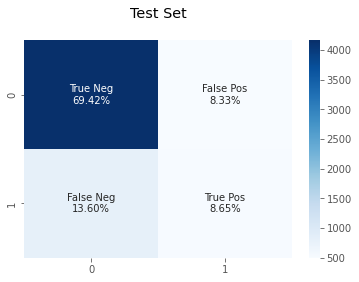

In [ ]:
## XGBoost

import xgboost as xgb
from sklearn import metrics
xgb_model_corr = xgb.XGBClassifier()

y_pred, acc, prec, rec, f1, auc , classification= get_model_results(X_train_corr, X_test_corr, y_train, y_test, xgb_model_corr, feat_imp= True)
print( classification)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ROC_AUC_Score of train set is 0.7601849142257633.
ROC_AUC_Score of test set is 0.771012279666494.
F1 of train set is 0.6458.
F1 of test set is 0.54.
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      4665
           1       0.50      0.58      0.54      1335

    accuracy                           0.78      6000
   macro avg       0.69      0.71      0.70      6000
weighted avg       0.79      0.78      0.78      6000



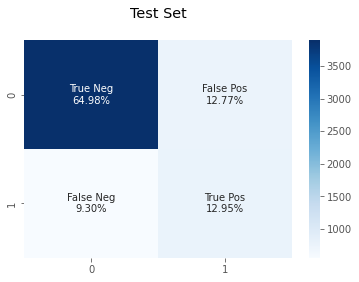

In [ ]:
## Logistic Regression

from sklearn import linear_model
logreg_corr = linear_model.LogisticRegression(C=1)
y_pred, acc, prec, rec, f1, auc , classification= get_model_results(X_train_corr, X_test_corr, y_train, y_test,logreg_corr, feat_imp= True)
print( classification)

ROC_AUC_Score of train set is 0.9886090165249479.
ROC_AUC_Score of test set is 0.5925491046160146.
F1 of train set is 0.9886.
F1 of test set is 0.3723.
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      4665
           1       0.35      0.40      0.37      1335

    accuracy                           0.70      6000
   macro avg       0.58      0.59      0.59      6000
weighted avg       0.72      0.70      0.71      6000



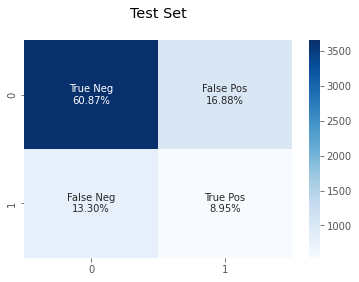

In [ ]:
## KNN

from sklearn.neighbors import KNeighborsClassifier  


from sklearn import linear_model
classifier_corr = KNeighborsClassifier(n_neighbors=1)
y_pred, acc, prec, rec, f1, auc , classification= get_model_results(X_train_corr, X_test_corr, y_train, y_test,classifier_corr, feat_imp= True)
print( classification)

ROC_AUC_Score of train set is 0.7577086392101514.
ROC_AUC_Score of test set is 0.7479977198919356.
F1 of train set is 0.6627.
F1 of test set is 0.5279.
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      4665
           1       0.48      0.59      0.53      1335

    accuracy                           0.76      6000
   macro avg       0.68      0.70      0.69      6000
weighted avg       0.79      0.76      0.77      6000



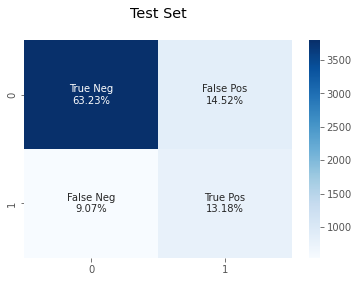

In [ ]:
#Calling the Decision TRee Classifier class

clf_gini_corr = DecisionTreeClassifier(criterion = "gini", max_depth=3, min_samples_leaf=5, max_leaf_nodes=99, random_state=42)
y_pred, acc, prec, rec, f1, auc , classification= get_model_results(X_train_corr, X_test_corr, y_train, y_test,clf_gini_corr, feat_imp= True)
print( classification)


# Feature Selection  using Logistic Regression
This is the Logistic regression-based model which selects the features based on the p-value score of the feature. The features with p-value less than 0.05 are considered to be the more relevant feature.

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())


Optimization terminated successfully.
         Current function value: 0.578049
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.166     
Dependent Variable: y                AIC:              43281.7178
Date:               2022-12-01 08:11 BIC:              43477.8934
No. Observations:   37398            Log-Likelihood:   -21618.   
Df Model:           22               LL-Null:          -25922.   
Df Residuals:       37375            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
               Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
-----------------------------------------------------------------
LIMIT_BAL      -1.2120   0.0891 -13.5960 0.0000  -1.3867  -1.0373
SEX            -0.1623   0.0239  -6.7980 0.0000  -0.2090  -0.1155


In [ ]:
X_train_lr = X_train.drop(['BILL_AMT3', 'BILL_AMT4', 'BILL_AMT6' ], axis=1) 
X_test_lr =  X_test.drop(['BILL_AMT3', 'BILL_AMT4', 'BILL_AMT6' ], axis=1) 

In [ ]:
selected_features_lr = np.array(X_train_lr.columns)

In [ ]:
## Selected features from logistic regression
selected_features_lr

array(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT5', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'], dtype=object)

In [ ]:
### Running models on selected features

ROC_AUC_Score of train set is 0.8671365739389995.
ROC_AUC_Score of test set is 0.6941336191496963.
F1 of train set is 0.7666.
F1 of test set is 0.4534.
              precision    recall  f1-score   support

           0       0.87      0.66      0.75      4665
           1       0.35      0.64      0.45      1335

    accuracy                           0.66      6000
   macro avg       0.61      0.65      0.60      6000
weighted avg       0.75      0.66      0.68      6000



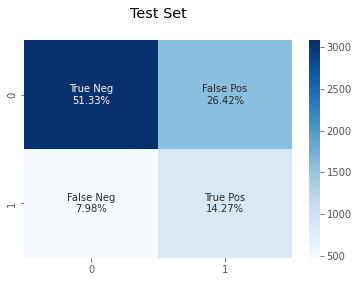

In [ ]:
## XGBoost

import xgboost as xgb
from sklearn import metrics
xgb_model_lr = xgb.XGBClassifier()


y_pred, acc, prec, rec, f1, auc , classification= get_model_results(X_train_lr, X_test_lr, y_train, y_test, xgb_model_lr, feat_imp= True)
print( classification)

ROC_AUC_Score of train set is 0.8457695228184503.
ROC_AUC_Score of test set is 0.758611622931143.
F1 of train set is 0.7442.
F1 of test set is 0.4965.
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      4665
           1       0.54      0.46      0.50      1335

    accuracy                           0.79      6000
   macro avg       0.70      0.67      0.68      6000
weighted avg       0.78      0.79      0.79      6000



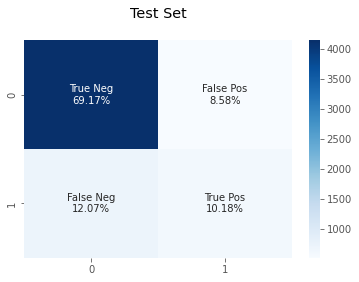

In [ ]:
## Random Forest 

RF_lr = RandomForestClassifier(n_jobs=100, criterion= 'gini', max_depth = 8, max_features = 'auto', random_state=9,n_estimators=500, verbose=False)
y_pred, acc, prec, rec, f1, auc , classification= get_model_results(X_train_lr, X_test_lr, y_train, y_test,RF_lr, feat_imp= True)
print( classification)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ROC_AUC_Score of train set is 0.7613598647304215.
ROC_AUC_Score of test set is 0.77145216389481.
F1 of train set is 0.6481.
F1 of test set is 0.5427.
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      4665
           1       0.50      0.60      0.54      1335

    accuracy                           0.78      6000
   macro avg       0.69      0.71      0.70      6000
weighted avg       0.79      0.78      0.78      6000



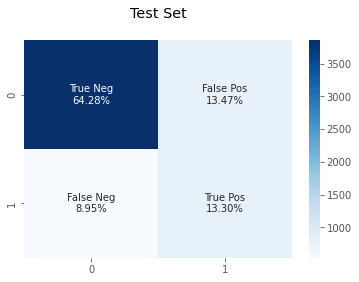

In [ ]:
## Logistic Regression

from sklearn import linear_model
logreg_lr = linear_model.LogisticRegression(C=1 )
y_pred, acc, prec, rec, f1, auc , classification= get_model_results(X_train_lr, X_test_lr, y_train, y_test,logreg_lr, feat_imp= True)
print( classification)

ROC_AUC_Score of train set is 0.9997058666238836.
ROC_AUC_Score of test set is 0.6069848380842275.
F1 of train set is 0.9997.
F1 of test set is 0.3951.
              precision    recall  f1-score   support

           0       0.83      0.77      0.80      4665
           1       0.36      0.44      0.40      1335

    accuracy                           0.70      6000
   macro avg       0.59      0.61      0.60      6000
weighted avg       0.72      0.70      0.71      6000



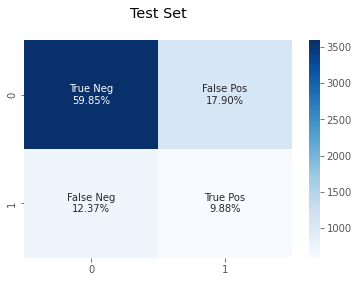

In [ ]:
## KNN

from sklearn.neighbors import KNeighborsClassifier  


from sklearn import linear_model
classifier_lr = KNeighborsClassifier(n_neighbors=1)
y_pred, acc, prec, rec, f1, auc , classification= get_model_results(X_train_lr, X_test_lr, y_train, y_test,classifier_lr, feat_imp= True)
print( classification)


ROC_AUC_Score of train set is 0.7667199464076059.
ROC_AUC_Score of test set is 0.7228431502422614.
F1 of train set is 0.6461.
F1 of test set is 0.5216.
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      4665
           1       0.49      0.56      0.52      1335

    accuracy                           0.77      6000
   macro avg       0.68      0.70      0.69      6000
weighted avg       0.78      0.77      0.78      6000



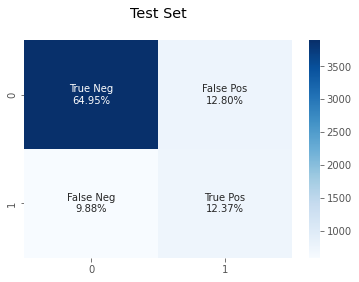

In [ ]:
#Calling the Decision TRee Classifier class

clf_gini_lr = DecisionTreeClassifier(criterion = "gini", max_depth=3, min_samples_leaf=5, max_leaf_nodes=99, random_state=42)
y_pred, acc, prec, rec, f1, auc , classification= get_model_results(X_train_lr, X_test_lr, y_train, y_test,clf_gini_lr, feat_imp= True)
print( classification)

# Random Forest Feature Selection

0.8096666666666666


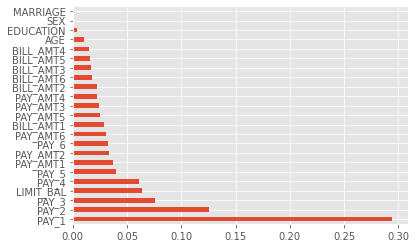

In [ ]:
# Random forest
forest =  RandomForestClassifier(n_jobs=100, criterion= 'gini', max_depth = 8, max_features = 'auto', random_state=9,n_estimators=500, verbose=False)
forest.fit(X_train, y_train)
prediction = forest.predict(X_test)
accuracy_score_randomForest = accuracy_score(y_true=y_test, y_pred=prediction)
print(accuracy_score_randomForest)

fi=pd.Series(forest.feature_importances_,index=X_train.columns).sort_values(ascending=False)
fi.plot(kind='barh');

In [ ]:
col=fi.index
col=col.to_list()

In [ ]:
col

['PAY_1',
 'PAY_2',
 'PAY_3',
 'LIMIT_BAL',
 'PAY_4',
 'PAY_5',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_6',
 'PAY_AMT6',
 'BILL_AMT1',
 'PAY_AMT5',
 'PAY_AMT3',
 'PAY_AMT4',
 'BILL_AMT2',
 'BILL_AMT6',
 'BILL_AMT3',
 'BILL_AMT5',
 'BILL_AMT4',
 'AGE',
 'EDUCATION',
 'SEX',
 'MARRIAGE']

In [ ]:
from sklearn.metrics import make_scorer,precision_recall_curve,auc,f1_score
results=[]

for i in range(8,23):
    model=RandomForestClassifier(n_jobs=100, criterion= 'gini', max_depth = 8, max_features = 'auto', random_state=9,n_estimators=500, verbose=False)
    model.fit(X_train[col[:i]],y_train)
    y_probs=model.predict_proba(X_test[col[:i]])
    precision,recall,_=precision_recall_curve(y_test,y_probs[:,1])
    results.append(auc(recall,precision))

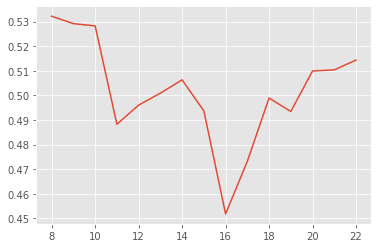

In [ ]:
plt.plot([i for i in range(8,23)],results)

In [ ]:
selected_features_rf = col[:8]

In [ ]:
notselected_rf = col[8:]


In [ ]:
selected_features_rf

['PAY_1',
 'PAY_2',
 'PAY_3',
 'LIMIT_BAL',
 'PAY_4',
 'PAY_5',
 'PAY_AMT1',
 'PAY_AMT2']

In [ ]:
X_train_rf = X_train[selected_features_rf]
X_test_rf = X_test[selected_features_rf]

In [ ]:
###running models on selected features 

ROC_AUC_Score of train set is 0.8513344177868707.
ROC_AUC_Score of test set is 0.736930685517701.
F1 of train set is 0.7479.
F1 of test set is 0.4655.
              precision    recall  f1-score   support

           0       0.88      0.61      0.72      4665
           1       0.34      0.72      0.47      1335

    accuracy                           0.63      6000
   macro avg       0.61      0.66      0.59      6000
weighted avg       0.76      0.63      0.66      6000



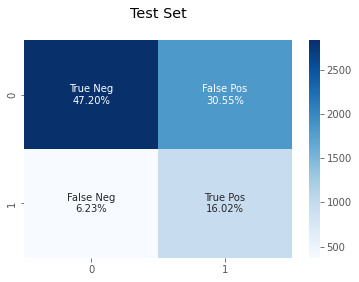

In [ ]:
## XGBoost

import xgboost as xgb
from sklearn import metrics
xgb_model_rf = xgb.XGBClassifier()

y_pred, acc, prec, rec, f1, auc , classification= get_model_results(X_train_rf, X_test_rf, y_train, y_test, xgb_model_rf, feat_imp= True)
print( classification)

ROC_AUC_Score of train set is 0.8216939890574416.
ROC_AUC_Score of test set is 0.7659329375258418.
F1 of train set is 0.7199.
F1 of test set is 0.5289.
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      4665
           1       0.47      0.60      0.53      1335

    accuracy                           0.76      6000
   macro avg       0.67      0.70      0.69      6000
weighted avg       0.79      0.76      0.77      6000



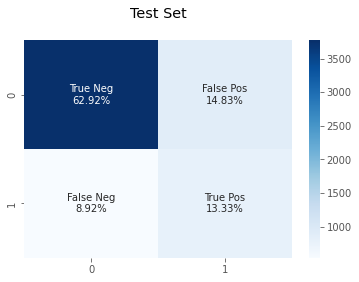

In [ ]:
## Random Forest 

RF_rf = RandomForestClassifier(n_jobs=100, criterion= 'gini', max_depth = 8, max_features = 'auto', random_state=9,n_estimators=500, verbose=False)
y_pred, acc, prec, rec, f1, auc , classification= get_model_results(X_train_rf, X_test_rf, y_train, y_test,RF_rf, feat_imp= True)
print( classification)

ROC_AUC_Score of train set is 0.7563515421983089.
ROC_AUC_Score of test set is 0.7632078872470505.
F1 of train set is 0.641.
F1 of test set is 0.5381.
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      4665
           1       0.50      0.58      0.54      1335

    accuracy                           0.78      6000
   macro avg       0.69      0.71      0.70      6000
weighted avg       0.79      0.78      0.78      6000



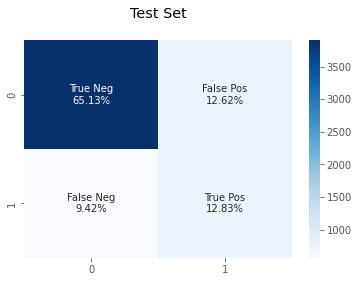

In [ ]:
## Logistic Regression

from sklearn import linear_model
logreg_rf = linear_model.LogisticRegression(C=1)
y_pred, acc, prec, rec, f1, auc , classification= get_model_results(X_train_rf, X_test_rf, y_train, y_test,logreg_rf, feat_imp= True)
print( classification)

ROC_AUC_Score of train set is 0.9731536445799241.
ROC_AUC_Score of test set is 0.5893842503944026.
F1 of train set is 0.9731.
F1 of test set is 0.3998.
              precision    recall  f1-score   support

           0       0.85      0.44      0.58      4665
           1       0.27      0.74      0.40      1335

    accuracy                           0.51      6000
   macro avg       0.56      0.59      0.49      6000
weighted avg       0.73      0.51      0.54      6000



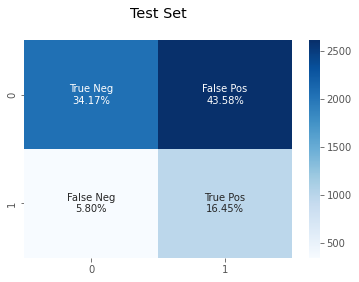

In [ ]:
## KNN

from sklearn.neighbors import KNeighborsClassifier  


from sklearn import linear_model
classifier_rf = KNeighborsClassifier(n_neighbors=1)
y_pred, acc, prec, rec, f1, auc , classification= get_model_results(X_train_rf, X_test_rf, y_train, y_test,classifier_rf, feat_imp= True)
print( classification)

ROC_AUC_Score of train set is 0.7620134892118248.
ROC_AUC_Score of test set is 0.7352470183974212.
F1 of train set is 0.6461.
F1 of test set is 0.5216.
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      4665
           1       0.49      0.56      0.52      1335

    accuracy                           0.77      6000
   macro avg       0.68      0.70      0.69      6000
weighted avg       0.78      0.77      0.78      6000



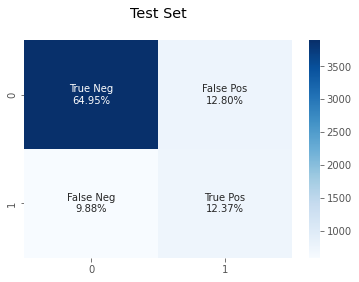

In [ ]:
#Calling the Decision TRee Classifier class

clf_gini_rf = DecisionTreeClassifier(criterion = "gini", max_depth=3, min_samples_leaf=5, max_leaf_nodes=99, random_state=42)
y_pred, acc, prec, rec, f1, auc , classification= get_model_results(X_train_rf, X_test_rf, y_train, y_test,clf_gini_rf, feat_imp= True)
print( classification)

Random Forest Feature Selection ROC Curve

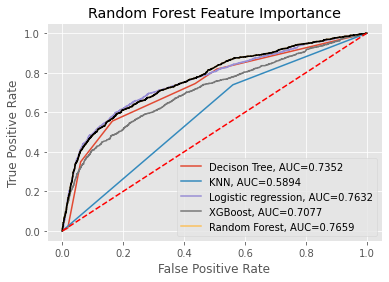

In [ ]:
from sklearn.metrics import roc_curve

clf_gini_rf = DecisionTreeClassifier(criterion = "gini", max_depth=3, min_samples_leaf=5, max_leaf_nodes=99, random_state=42)
clf_gini_rf.fit(X_train_rf, y_train)
y_pred_proba = clf_gini_rf.predict_proba(X_test_rf)[:,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = round(metrics.roc_auc_score(y_test, y_pred_proba), 4)
plt.plot(fpr,tpr,label="Decison Tree, AUC="+str(auc))


classifier_rf = KNeighborsClassifier(n_neighbors=1)
classifier_rf.fit(X_train_rf, y_train)
y_pred_proba = classifier_rf.predict_proba(X_test_rf)[:,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = round(metrics.roc_auc_score(y_test, y_pred_proba), 4)
plt.plot(fpr,tpr,label="KNN, AUC="+str(auc))

logreg_rf = linear_model.LogisticRegression(C=1)
logreg_rf.fit(X_train_rf, y_train)
y_pred_proba = logreg_rf.predict_proba(X_test_rf)[:,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = round(metrics.roc_auc_score(y_test, y_pred_proba), 4)
plt.plot(fpr,tpr,label="Logistic regression, AUC="+str(auc))



xgb_model_rf = xgb.XGBClassifier(objective='binary:logistic', reg_alpha = 0.1, reg_lambda = 0, n_estimators=150, seed=0, gamma = 0.1, learning_rate = 0.1, max_depth=6)
xgb_model_rf.fit(X_train_rf, y_train)
y_pred_proba = xgb_model_rf.predict_proba(X_test_rf)[:,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = round(metrics.roc_auc_score(y_test, y_pred_proba), 4)
plt.plot(fpr,tpr,label="XGBoost, AUC="+str(auc))

RF_rf = RandomForestClassifier(n_jobs=100, criterion= 'gini', max_depth = 8, max_features = 'auto', random_state=9,n_estimators=500, verbose=False)
RF_rf.fit(X_train_rf, y_train)
y_pred_proba = RF_rf.predict_proba(X_test_rf)[:,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = round(metrics.roc_auc_score(y_test, y_pred_proba), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))


#create ROC curve
plt.plot(fpr,tpr, 'k')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Random Forest Feature Importance')
plt.legend()
plt.show()

LR Feature selection ROC curve

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


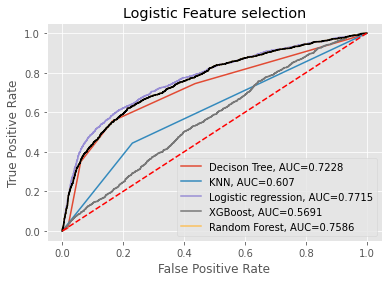

In [ ]:
from sklearn.metrics import roc_curve


clf_gini_lr = DecisionTreeClassifier(criterion = "gini", max_depth=3, min_samples_leaf=5, max_leaf_nodes=99, random_state=42)
clf_gini_lr.fit(X_train_lr, y_train)
y_pred_proba = clf_gini_lr.predict_proba(X_test_lr)[:,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = round(metrics.roc_auc_score(y_test, y_pred_proba), 4)
plt.plot(fpr,tpr,label="Decison Tree, AUC="+str(auc))


classifier_lr = KNeighborsClassifier(n_neighbors=1)
classifier_lr.fit(X_train_lr, y_train)
y_pred_proba = classifier_lr.predict_proba(X_test_lr)[:,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = round(metrics.roc_auc_score(y_test, y_pred_proba), 4)
plt.plot(fpr,tpr,label="KNN, AUC="+str(auc))

logreg_lr = linear_model.LogisticRegression(C=1)
logreg_lr.fit(X_train_lr, y_train)
y_pred_proba = logreg_lr.predict_proba(X_test_lr)[:,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = round(metrics.roc_auc_score(y_test, y_pred_proba), 4)
plt.plot(fpr,tpr,label="Logistic regression, AUC="+str(auc))



xgb_model_lr = xgb.XGBClassifier(objective='binary:logistic', reg_alpha = 0.1, reg_lambda = 0, n_estimators=150, seed=0, gamma = 0.1, learning_rate = 0.1, max_depth=6)
xgb_model_lr.fit(X_train_lr, y_train)
y_pred_proba = xgb_model_lr.predict_proba(X_test_lr)[:,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = round(metrics.roc_auc_score(y_test, y_pred_proba), 4)
plt.plot(fpr,tpr,label="XGBoost, AUC="+str(auc))

RF_lr = RandomForestClassifier(n_jobs=100, criterion= 'gini', max_depth = 8, max_features = 'auto', random_state=9,n_estimators=500, verbose=False)
RF_lr.fit(X_train_lr, y_train)
y_pred_proba = RF_lr.predict_proba(X_test_lr)[:,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = round(metrics.roc_auc_score(y_test, y_pred_proba), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))


#create ROC curve
plt.plot(fpr,tpr, 'k')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Logistic Feature selection')
plt.legend()
plt.show()

Correaltion with Chi-square Feature selection ROC curve

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


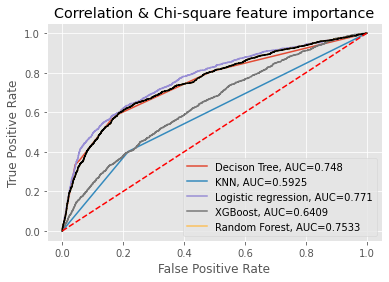

In [ ]:
from sklearn.metrics import roc_curve

clf_gini_corr = DecisionTreeClassifier(criterion = "gini", max_depth=3, min_samples_leaf=5, max_leaf_nodes=99, random_state=42)
clf_gini_corr.fit(X_train_corr, y_train)
y_pred_proba = clf_gini_corr.predict_proba(X_test_corr)[:,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = round(metrics.roc_auc_score(y_test, y_pred_proba), 4)
plt.plot(fpr,tpr,label="Decison Tree, AUC="+str(auc))


classifier_corr = KNeighborsClassifier(n_neighbors=1)
classifier_corr.fit(X_train_corr, y_train)
y_pred_proba = classifier_corr.predict_proba(X_test_corr)[:,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = round(metrics.roc_auc_score(y_test, y_pred_proba), 4)
plt.plot(fpr,tpr,label="KNN, AUC="+str(auc))

logreg_corr = linear_model.LogisticRegression(C=1)
logreg_corr.fit(X_train_corr, y_train)
y_pred_proba = logreg_corr.predict_proba(X_test_corr)[:,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = round(metrics.roc_auc_score(y_test, y_pred_proba), 4)
plt.plot(fpr,tpr,label="Logistic regression, AUC="+str(auc))



xgb_model_corr = xgb.XGBClassifier(objective='binary:logistic', reg_alpha = 0.1, reg_lambda = 0, n_estimators=150, seed=0, gamma = 0.1, learning_rate = 0.1, max_depth=6)
xgb_model_corr.fit(X_train_corr, y_train)
y_pred_proba = xgb_model_corr.predict_proba(X_test_corr)[:,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = round(metrics.roc_auc_score(y_test, y_pred_proba), 4)
plt.plot(fpr,tpr,label="XGBoost, AUC="+str(auc))

RF_corr = RandomForestClassifier(n_jobs=100, criterion= 'gini', max_depth = 8, max_features = 'auto', random_state=9,n_estimators=500, verbose=False)
RF_corr.fit(X_train_corr, y_train)
y_pred_proba = RF_corr.predict_proba(X_test_corr)[:,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = round(metrics.roc_auc_score(y_test, y_pred_proba), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))


#create ROC curve
plt.plot(fpr,tpr, 'k')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Correlation & Chi-square feature importance')
plt.legend()

Ttest feature selection ROC curve

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


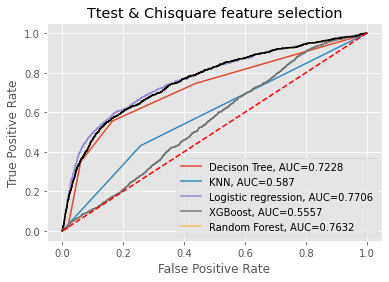

In [ ]:
clf_gini_ttest = DecisionTreeClassifier(criterion = "gini", max_depth=3, min_samples_leaf=5, max_leaf_nodes=99, random_state=42)
clf_gini_ttest.fit(X_train_ttest, y_train)
y_pred_proba = clf_gini_ttest.predict_proba(X_test_ttest)[:,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = round(metrics.roc_auc_score(y_test, y_pred_proba), 4)
plt.plot(fpr,tpr,label="Decison Tree, AUC="+str(auc))


classifier_ttest = KNeighborsClassifier(n_neighbors=1)
classifier_ttest.fit(X_train_ttest, y_train)
y_pred_proba = classifier_ttest.predict_proba(X_test_ttest)[:,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = round(metrics.roc_auc_score(y_test, y_pred_proba), 4)
plt.plot(fpr,tpr,label="KNN, AUC="+str(auc))

logreg_ttest = linear_model.LogisticRegression(C=1)
logreg_ttest.fit(X_train_ttest, y_train)
y_pred_proba = logreg_ttest.predict_proba(X_test_ttest)[:,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = round(metrics.roc_auc_score(y_test, y_pred_proba), 4)
plt.plot(fpr,tpr,label="Logistic regression, AUC="+str(auc))



xgb_model_ttest = xgb.XGBClassifier(objective='binary:logistic', reg_alpha = 0.1, reg_lambda = 0, n_estimators=150, seed=0, gamma = 0.1, learning_rate = 0.1, max_depth=6)
xgb_model_ttest.fit(X_train_ttest, y_train)
y_pred_proba = xgb_model_ttest.predict_proba(X_test_ttest)[:,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = round(metrics.roc_auc_score(y_test, y_pred_proba), 4)
plt.plot(fpr,tpr,label="XGBoost, AUC="+str(auc))

RF_ttest = RandomForestClassifier(n_jobs=100, criterion= 'gini', max_depth = 8, max_features = 'auto', random_state=9,n_estimators=500, verbose=False)
RF_ttest.fit(X_train_ttest, y_train)
y_pred_proba = RF_ttest.predict_proba(X_test_ttest)[:,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = round(metrics.roc_auc_score(y_test, y_pred_proba), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))


#create ROC curve
plt.plot(fpr,tpr, 'k')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.title('Ttest & Chisquare feature selection')
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


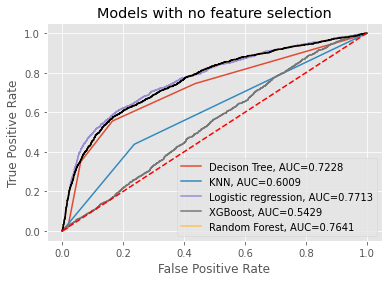

In [ ]:
clf_gini = DecisionTreeClassifier(criterion = "gini", max_depth=3, min_samples_leaf=5, max_leaf_nodes=99, random_state=42)
clf_gini.fit(X_train, y_train)
y_pred_proba = clf_gini.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = round(metrics.roc_auc_score(y_test, y_pred_proba), 4)
plt.plot(fpr,tpr,label="Decison Tree, AUC="+str(auc))


classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train, y_train)
y_pred_proba = classifier.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = round(metrics.roc_auc_score(y_test, y_pred_proba), 4)
plt.plot(fpr,tpr,label="KNN, AUC="+str(auc))

logreg = linear_model.LogisticRegression(C=1)
logreg.fit(X_train, y_train)
y_pred_proba = logreg.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = round(metrics.roc_auc_score(y_test, y_pred_proba), 4)
plt.plot(fpr,tpr,label="Logistic regression, AUC="+str(auc))



xgb_model = xgb.XGBClassifier(objective='binary:logistic', reg_alpha = 0.1, reg_lambda = 0, n_estimators=150, seed=0, gamma = 0.1, learning_rate = 0.1, max_depth=6)
xgb_model.fit(X_train, y_train)
y_pred_proba = xgb_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = round(metrics.roc_auc_score(y_test, y_pred_proba), 4)
plt.plot(fpr,tpr,label="XGBoost, AUC="+str(auc))

RF = RandomForestClassifier(n_jobs=100, criterion= 'gini', max_depth = 8, max_features = 'auto', random_state=9,n_estimators=500, verbose=False)
RF.fit(X_train, y_train)
y_pred_proba = RF.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = round(metrics.roc_auc_score(y_test, y_pred_proba), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))


#create ROC curve
plt.plot(fpr,tpr, 'k')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.title('Models with no feature selection')
plt.show()

In [ ]:
df['default'].value_counts()
plt.title('Default Payment Next Month - Data Imbalance Check')
ax1 = sns.countplot(x='default', data = df)
ax1.set_xticklabels(['No Default','Default'])
plt.show()